# Scrapping The Data From CdsApi

In [1]:
!pip install cdsapi
!pip install folium
!pip install xarray

In [2]:
url= 'https://cds.climate.copernicus.eu/api/v2'
key= 'a8e39b4a-0eb8-4f40-939a-4a1a2b2dcc04'

In [3]:
import cdsapi

c = cdsapi.Client(
    url="https://cds.climate.copernicus.eu/api/v2",
    key='280702:a8e39b4a-0eb8-4f40-939a-4a1a2b2dcc04'

)



c.retrieve(
    'cems-fire-historical-v1',
    {
        'product_type': 'ensemble_members',
        'dataset_type': 'consolidated_dataset',
        'system_version': '4_1',
        'month': '02',
        'day': '18',
        'area': [
             53.270962, -9.062691, -9.062691,
            53.270962,
        ],
        'grid': '0.25/0.25',
        'format': 'netcdf',
        'variable': [
           'build_up_index', 'burning_index', 'drought_code',
            'drought_factor', 'duff_moisture_code', 'fine_fuel_moisture_code',
            'fire_daily_severity_rating', 'fire_danger_index', 'fire_weather_index',
            'initial_fire_spread_index',
        ],
        'year': [
            '2018', '2019', '2020',
            '2021', '2022',
        ],
    },
    'download.nc')

2024-02-06 15:36:45,938 INFO Welcome to the CDS
2024-02-06 15:36:45,943 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-fire-historical-v1
2024-02-06 15:36:46,102 INFO Request is completed
2024-02-06 15:36:46,107 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data5/adaptor.mars.external-1707193597.3707395-11311-2-0a217b55-62b1-40b7-b36e-62e06edec86f.nc to download.nc (119.3M)
2024-02-06 15:37:06,866 INFO Download rate 5.7M/s                                                                      


Result(content_length=125083573,content_type=application/x-netcdf,location=https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data5/adaptor.mars.external-1707193597.3707395-11311-2-0a217b55-62b1-40b7-b36e-62e06edec86f.nc)

# The Data is NC file Need to Convert in csv Python readable format

In [4]:
import xarray as xr
import os
import pandas as pd

In [6]:
df = pd.read_csv("ireland_data.csv")


df = df.dropna()

In [7]:
import pandas as pd

# Filter the data based on latitude and longitude ranges for Ireland
data = df[(df['latitude'] >= 51.3) & (df['latitude'] <= 55.4) & (df['longitude'] >= -10.5) & (df['longitude'] <= -5.7)]

data


Unnamed: 0  number                 time  latitude  longitude  surface  \
0              0       0  2018-02-18 12:00:00   53.6945    -7.3055      0.0   
1              1       0  2018-02-18 12:00:00   53.6945    -7.0555      0.0   
2              2       0  2018-02-18 12:00:00   53.6945    -6.8055      0.0   
3              3       0  2018-02-18 12:00:00   53.6945    -6.5555      0.0   
4              4       0  2018-02-18 12:00:00   53.6945    -6.3055      0.0   
...          ...     ...                  ...       ...        ...      ...   
2845     2942944       9  2022-02-18 12:00:00   51.9445    -6.3055      0.0   
2846     2943186       9  2022-02-18 12:00:00   51.6945    -7.0555      0.0   
2847     2943187       9  2022-02-18 12:00:00   51.6945    -6.8055      0.0   
2848     2943188       9  2022-02-18 12:00:00   51.6945    -6.5555      0.0   
2849     2943189       9  2022-02-18 12:00:00   51.6945    -6.3055      0.0   

      fbupinx  buinfdr  drtcode    drtmrk  dufmcode    ffmcode    fdsrte  \
0        1.00      0.0     4.50  5.732309      0.75  65.199875  0.003906   
1        1.25      0.0     4.50  5.744516      0.75  67.084640  0.003906   
2        1.00      0.0     4.75  5.752573      0.75  67.182300  0.003906   
3        1.00      0.0     5.00  5.760629      0.75  67.272140  0.003906   
4        1.00      0.0     5.25  5.768198      0.75  68.633470  0.003906   
...       ...      ...      ...       ...       ...        ...       ...   
2845     0.50      0.0     8.00  4.708134      0.25  52.473656  0.093750   
2846     0.50      0.0     8.00  4.698613      0.25  52.448265  0.093750   
2847     0.50      0.0     8.00  4.708134      0.25  52.473656  0.093750   
2848     0.50      0.0     8.00  4.708134      0.25  52.473656  0.093750   
2849     0.50      0.0     8.00  4.708134      0.25  52.473656  0.093750   

        fdimrk     fwinx   infsinx  
0     0.482422  0.273438  1.031250  
1     0.513672  0.300781  1.134766  
2     0.557617  0.306641  1.161133  
3     0.601562  0.310547  1.187500  
4     0.632812  0.333984  1.265625  
...        ...       ...       ...  
2845  0.000000  1.996094  5.531293  
2846  0.000000  1.976562  5.488325  
2847  0.000000  1.996094  5.531293  
2848  0.000000  1.996094  5.531293  
2849  0.000000  1.996094  5.531293  

[2850 rows x 16 columns]

# Filtered the Data For Ireland Forests only and Plotting it on Map Directly

In [8]:
import folium
from IPython.display import display

# Create a folium map centered around the mean latitude and longitude
map_center = [data['latitude'].mean(), data['longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=8)

# Plot the scatter points on the map
for index, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['latitude']}, {row['longitude']}"
    ).add_to(my_map)

# Display the map directly in the Jupyter notebook
display(my_map)


# Starting Exploring Data 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("ireland_data.csv")

In [3]:
df.head()

Unnamed: 0  number                 time  latitude  longitude  surface  \
0           0       0  2018-02-18 12:00:00   53.6945    -7.3055      0.0   
1           1       0  2018-02-18 12:00:00   53.6945    -7.0555      0.0   
2           2       0  2018-02-18 12:00:00   53.6945    -6.8055      0.0   
3           3       0  2018-02-18 12:00:00   53.6945    -6.5555      0.0   
4           4       0  2018-02-18 12:00:00   53.6945    -6.3055      0.0   

   fbupinx  buinfdr  drtcode    drtmrk  dufmcode    ffmcode    fdsrte  \
0     1.00      0.0     4.50  5.732309      0.75  65.199875  0.003906   
1     1.25      0.0     4.50  5.744516      0.75  67.084640  0.003906   
2     1.00      0.0     4.75  5.752573      0.75  67.182300  0.003906   
3     1.00      0.0     5.00  5.760629      0.75  67.272140  0.003906   
4     1.00      0.0     5.25  5.768198      0.75  68.633470  0.003906   

     fdimrk     fwinx   infsinx  
0  0.482422  0.273438  1.031250  
1  0.513672  0.300781  1.134766  
2  0.557617  0.306641  1.161133  
3  0.601562  0.310547  1.187500  
4  0.632812  0.333984  1.265625

# Concatinating the Simulated data(ccf) and scrapped data of irish forests

In [4]:
import pandas as pd



df1 = df.truncate(after=999)

In [6]:
data=pd.read_csv("simulated_data.csv")

In [7]:
data.head()

OverallFireRisk  FineFuelMoisture  InitialSpreadIndex UnevenAgedCanopy  \
0             Low          5.018856           18.676454               No   
1        Very Low          6.656874            9.350941               No   
2        Moderate         15.090053           37.350555              Yes   
3        Very Low          7.611128           16.753994              Yes   
4            High         11.874508           33.633801              Yes   

  SpeciesDiversity ContinuousCanopyCover DroughtConditions  WindSpeed  \
0           Medium                   Yes              None   2.501573   
1             High                   Yes              None  13.793198   
2             High                   Yes              None   3.878573   
3           Medium                   Yes              None   6.460220   
4             High                   Yes              None  20.313700   

   Temperature   FireWarnings  FireOccurrence  
0    19.837361  Low Fire Risk               0  
1    12.697620  Low Fire Risk               0  
2    11.412013  Low Fire Risk               0  
3    26.059710  Low Fire Risk               0  
4    25.500978  Low Fire Risk               0

In [8]:
import pandas as pd

# Assuming df and data are your dataframes
my_data = pd.concat([df1, data], axis=1)

# Optionally, you can reset the index of the resulting dataframe
my_data.reset_index(drop=True, inplace=True)


In [9]:
my_data.head()

Unnamed: 0  number                 time  latitude  longitude  surface  \
0           0       0  2018-02-18 12:00:00   53.6945    -7.3055      0.0   
1           1       0  2018-02-18 12:00:00   53.6945    -7.0555      0.0   
2           2       0  2018-02-18 12:00:00   53.6945    -6.8055      0.0   
3           3       0  2018-02-18 12:00:00   53.6945    -6.5555      0.0   
4           4       0  2018-02-18 12:00:00   53.6945    -6.3055      0.0   

   fbupinx  buinfdr  drtcode    drtmrk  ...  FineFuelMoisture  \
0     1.00      0.0     4.50  5.732309  ...          5.018856   
1     1.25      0.0     4.50  5.744516  ...          6.656874   
2     1.00      0.0     4.75  5.752573  ...         15.090053   
3     1.00      0.0     5.00  5.760629  ...          7.611128   
4     1.00      0.0     5.25  5.768198  ...         11.874508   

   InitialSpreadIndex  UnevenAgedCanopy  SpeciesDiversity  \
0           18.676454                No            Medium   
1            9.350941                No              High   
2           37.350555               Yes              High   
3           16.753994               Yes            Medium   
4           33.633801               Yes              High   

   ContinuousCanopyCover  DroughtConditions  WindSpeed  Temperature  \
0                    Yes               None   2.501573    19.837361   
1                    Yes               None  13.793198    12.697620   
2                    Yes               None   3.878573    11.412013   
3                    Yes               None   6.460220    26.059710   
4                    Yes               None  20.313700    25.500978   

    FireWarnings FireOccurrence  
0  Low Fire Risk              0  
1  Low Fire Risk              0  
2  Low Fire Risk              0  
3  Low Fire Risk              0  
4  Low Fire Risk              0  

[5 rows x 27 columns]

In [10]:
# Assuming your concatenated dataframe is named result
my_data.to_csv('new_dataset.csv', index=False)


# **Data cleaning**

In [11]:
# Assuming your concatenated dataframe is named result
null_values = my_data.isnull().sum()

# Display the total null values for each column
print("Total null values in each column:")
print(null_values)


Total null values in each column:
Unnamed: 0               0
number                   0
time                     0
latitude                 0
longitude                0
surface                  0
fbupinx                  0
buinfdr                  0
drtcode                  0
drtmrk                   0
dufmcode                 0
ffmcode                  0
fdsrte                   0
fdimrk                   0
fwinx                    0
infsinx                  0
OverallFireRisk          0
FineFuelMoisture         0
InitialSpreadIndex       0
UnevenAgedCanopy         0
SpeciesDiversity         0
ContinuousCanopyCover    0
DroughtConditions        0
WindSpeed                0
Temperature              0
FireWarnings             0
FireOccurrence           0
dtype: int64


In [12]:
unique_values = my_data['OverallFireRisk'].unique()

# Display the unique values in the "OverallFireRisk" column
print("Unique values in OverallFireRisk column:")
print(unique_values)


Unique values in OverallFireRisk column:
['Low' 'Very Low' 'Moderate' 'High' 'Extreme']


# Converting Categorical Features into Numerical using LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder

# Assuming your concatenated dataframe is named my_data
columns_to_encode = ['OverallFireRisk', 'UnevenAgedCanopy', 'SpeciesDiversity', 'ContinuousCanopyCover', 'DroughtConditions', 'FireWarnings']

# Check if the columns to encode are present in the dataframe
missing_columns = [col for col in columns_to_encode if col not in my_data.columns]

# If there are missing columns, print a message and handle accordingly
if missing_columns:
    print(f"Columns {missing_columns} not found in the dataframe.")
else:
    # Create a LabelEncoder for each specified column
    label_encoders = {}

    for column in columns_to_encode:
        label_encoder = LabelEncoder()
        my_data[column] = label_encoder.fit_transform(my_data[column])
        label_encoders[column] = label_encoder

        # Display the mapping from original categorical values to numeric values for the column
        mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        print(f"Mapping for '{column}' column:")
        for category, numeric_value in mapping.items():
            print(f"{category}: {numeric_value}")
        print()


Mapping for 'OverallFireRisk' column:
Extreme: 0
High: 1
Low: 2
Moderate: 3
Very Low: 4

Mapping for 'UnevenAgedCanopy' column:
No: 0
Yes: 1

Mapping for 'SpeciesDiversity' column:
High: 0
Low: 1
Medium: 2

Mapping for 'ContinuousCanopyCover' column:
No: 0
Yes: 1

Mapping for 'DroughtConditions' column:
Absolute Drought: 0
Dry Spell: 1
None: 2
Partial Drought: 3

Mapping for 'FireWarnings' column:
High Fire Risk: 0
Low Fire Risk: 1



In [14]:
my_data.head()

Unnamed: 0  number                 time  latitude  longitude  surface  \
0           0       0  2018-02-18 12:00:00   53.6945    -7.3055      0.0   
1           1       0  2018-02-18 12:00:00   53.6945    -7.0555      0.0   
2           2       0  2018-02-18 12:00:00   53.6945    -6.8055      0.0   
3           3       0  2018-02-18 12:00:00   53.6945    -6.5555      0.0   
4           4       0  2018-02-18 12:00:00   53.6945    -6.3055      0.0   

   fbupinx  buinfdr  drtcode    drtmrk  ...  FineFuelMoisture  \
0     1.00      0.0     4.50  5.732309  ...          5.018856   
1     1.25      0.0     4.50  5.744516  ...          6.656874   
2     1.00      0.0     4.75  5.752573  ...         15.090053   
3     1.00      0.0     5.00  5.760629  ...          7.611128   
4     1.00      0.0     5.25  5.768198  ...         11.874508   

   InitialSpreadIndex  UnevenAgedCanopy  SpeciesDiversity  \
0           18.676454                 0                 2   
1            9.350941                 0                 0   
2           37.350555                 1                 0   
3           16.753994                 1                 2   
4           33.633801                 1                 0   

   ContinuousCanopyCover  DroughtConditions  WindSpeed  Temperature  \
0                      1                  2   2.501573    19.837361   
1                      1                  2  13.793198    12.697620   
2                      1                  2   3.878573    11.412013   
3                      1                  2   6.460220    26.059710   
4                      1                  2  20.313700    25.500978   

   FireWarnings  FireOccurrence  
0             1               0  
1             1               0  
2             1               0  
3             1               0  
4             1               0  

[5 rows x 27 columns]

# We have imbalanced data so making it balanced using RandomOverSampler

In [15]:

column_to_check = 'OverallFireRisk'

# Check if the column to check is present in the dataframe
if column_to_check not in my_data.columns:
    print(f"Column {column_to_check} not found in the dataframe.")
else:
    # Display the count of values in the specified column
    value_counts = my_data[column_to_check].value_counts()

    print(f"Value counts for {column_to_check} column:")
    print(value_counts)

Value counts for OverallFireRisk column:
2    206
1    201
4    198
0    198
3    197
Name: OverallFireRisk, dtype: int64


In [9]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy>=1.5.0 in c:\users\jaygi\anaconda3\lib\site-packages (from imbalanced-learn) (1.5.2)



In [17]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming your concatenated dataframe is named my_data
column_to_balance = 'OverallFireRisk'

# Check if the column to balance is present in the dataframe
if column_to_balance not in my_data.columns:
    print(f"Column {column_to_balance} not found in the dataframe.")
else:
    # Display the value counts before balancing
    print(f"Value counts before balancing for {column_to_balance} column:")
    print(my_data[column_to_balance].value_counts())

    # Separate features and target variable
    X = my_data.drop(column_to_balance, axis=1)
    y = my_data[column_to_balance]

    # Create a RandomOverSampler
    oversampler = RandomOverSampler(random_state=42)

    # Fit and apply the oversampler
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    # Create a new balanced dataframe
    balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=column_to_balance)], axis=1)

    # Display the value counts after balancing
    print(f"\nValue counts after balancing for {column_to_balance} column:")
    print(balanced_data[column_to_balance].value_counts())


Value counts before balancing for OverallFireRisk column:
2    206
1    201
4    198
0    198
3    197
Name: OverallFireRisk, dtype: int64

Value counts after balancing for OverallFireRisk column:
2    206
4    206
3    206
1    206
0    206
Name: OverallFireRisk, dtype: int64


In [18]:
balanced_data.head()

Unnamed: 0  number                 time  latitude  longitude  surface  \
0           0       0  2018-02-18 12:00:00   53.6945    -7.3055      0.0   
1           1       0  2018-02-18 12:00:00   53.6945    -7.0555      0.0   
2           2       0  2018-02-18 12:00:00   53.6945    -6.8055      0.0   
3           3       0  2018-02-18 12:00:00   53.6945    -6.5555      0.0   
4           4       0  2018-02-18 12:00:00   53.6945    -6.3055      0.0   

   fbupinx  buinfdr  drtcode    drtmrk  ...  InitialSpreadIndex  \
0     1.00      0.0     4.50  5.732309  ...           18.676454   
1     1.25      0.0     4.50  5.744516  ...            9.350941   
2     1.00      0.0     4.75  5.752573  ...           37.350555   
3     1.00      0.0     5.00  5.760629  ...           16.753994   
4     1.00      0.0     5.25  5.768198  ...           33.633801   

   UnevenAgedCanopy  SpeciesDiversity  ContinuousCanopyCover  \
0                 0                 2                      1   
1                 0                 0                      1   
2                 1                 0                      1   
3                 1                 2                      1   
4                 1                 0                      1   

   DroughtConditions  WindSpeed  Temperature  FireWarnings  FireOccurrence  \
0                  2   2.501573    19.837361             1               0   
1                  2  13.793198    12.697620             1               0   
2                  2   3.878573    11.412013             1               0   
3                  2   6.460220    26.059710             1               0   
4                  2  20.313700    25.500978             1               0   

   OverallFireRisk  
0                2  
1                4  
2                3  
3                4  
4                1  

[5 rows x 27 columns]

# **EXPLORATORY DATA ANALYSIS**

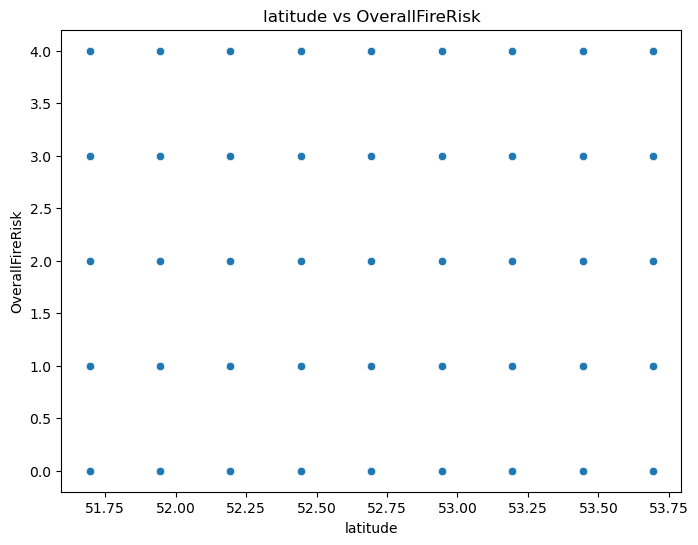

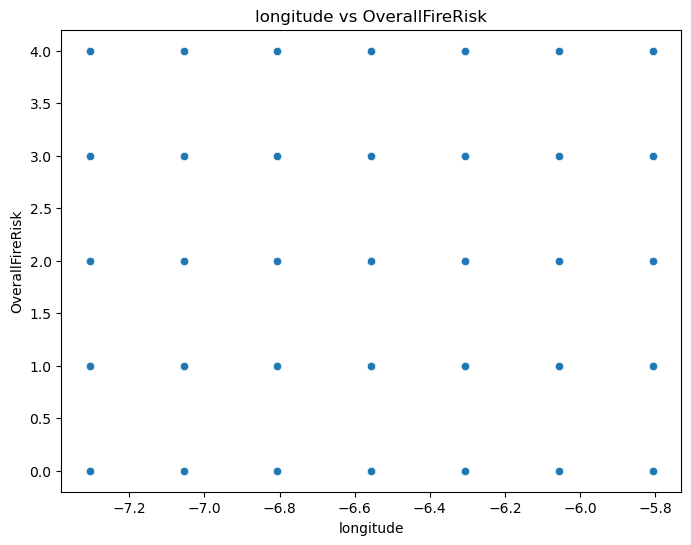

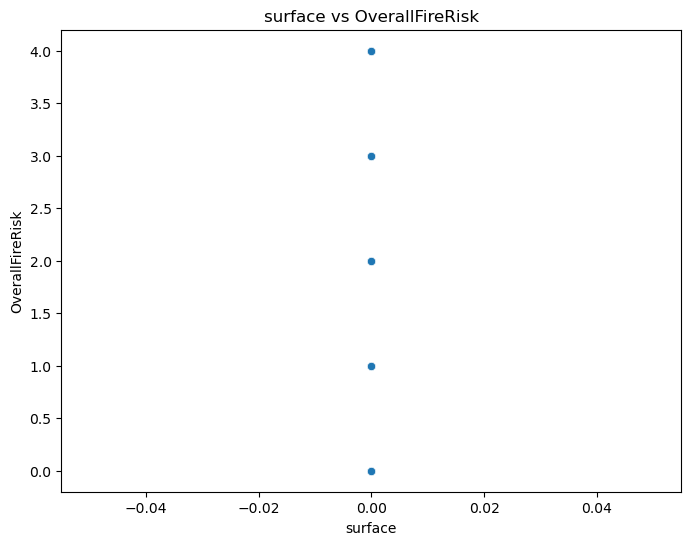

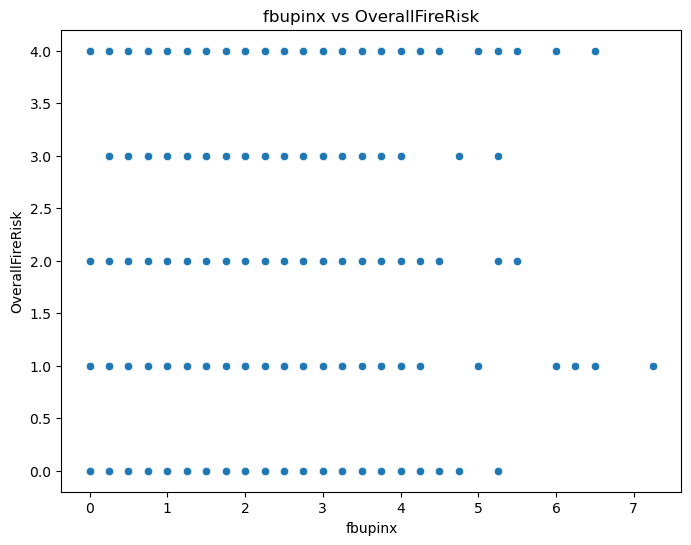

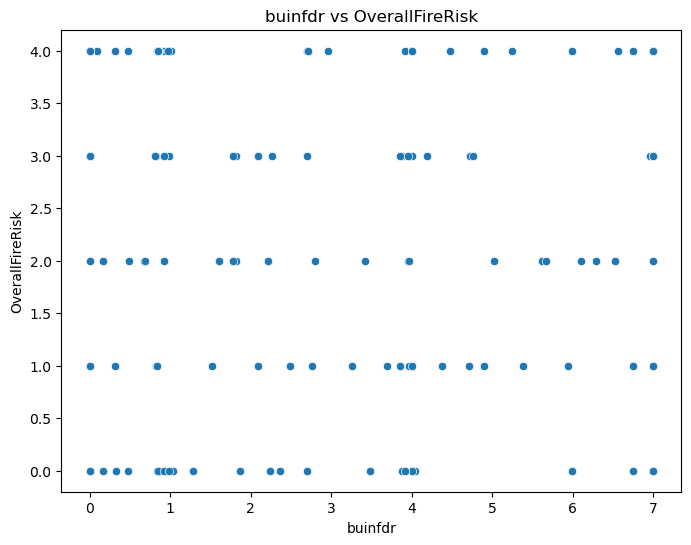

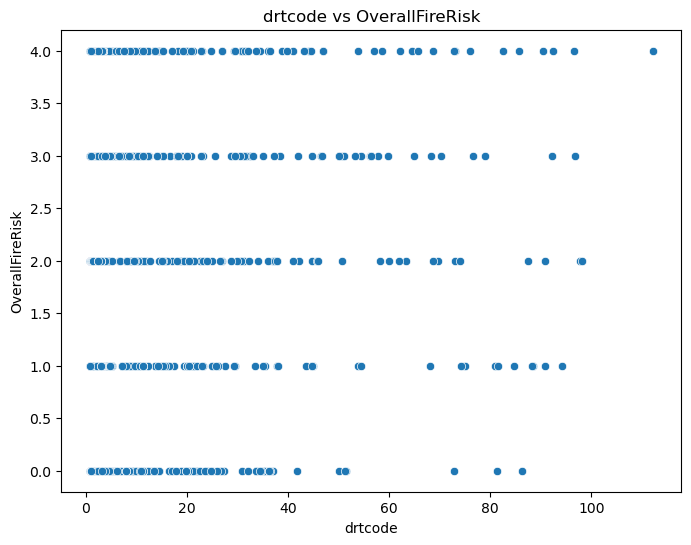

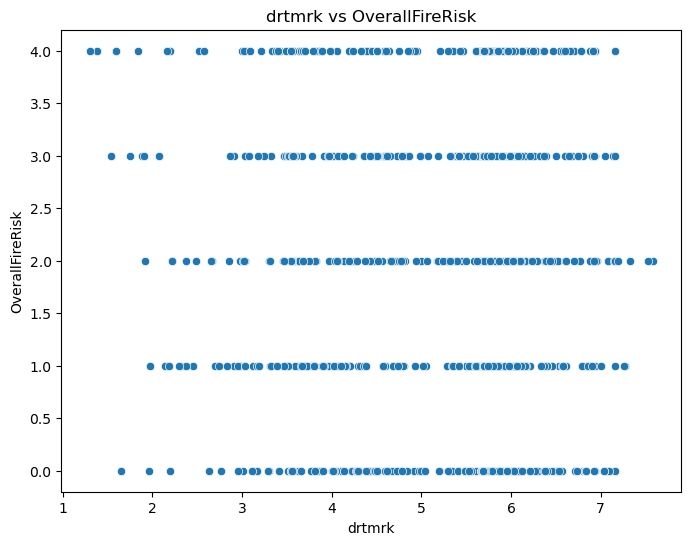

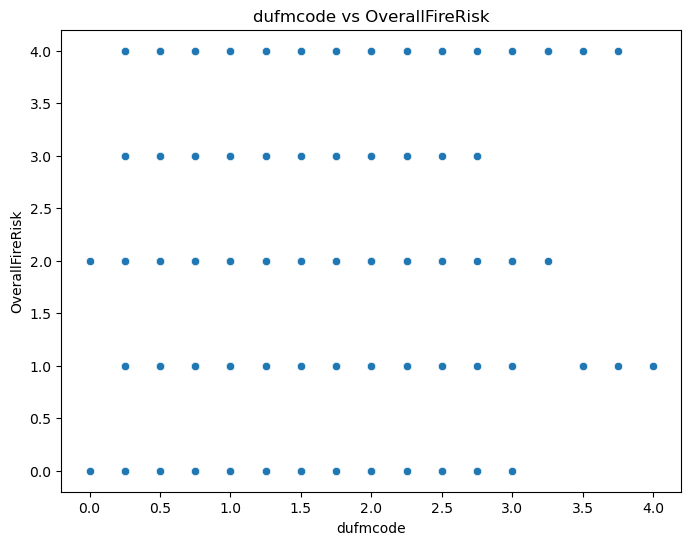

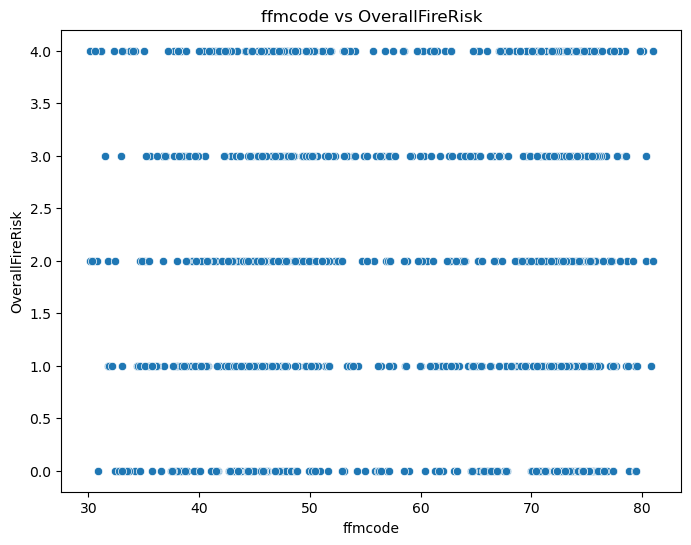

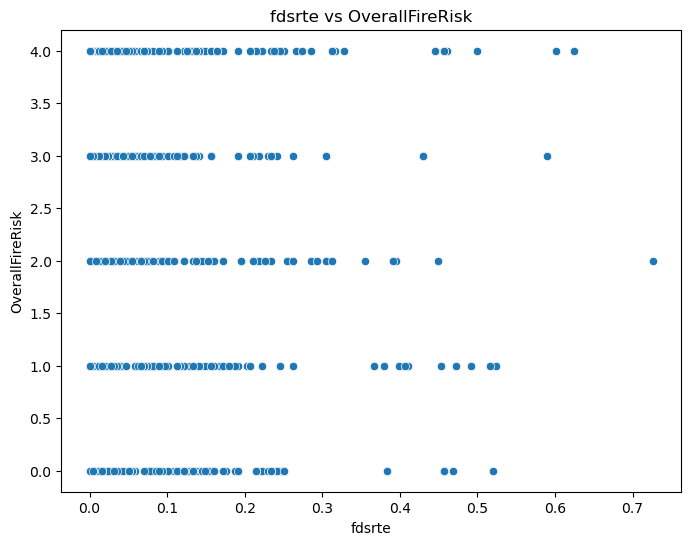

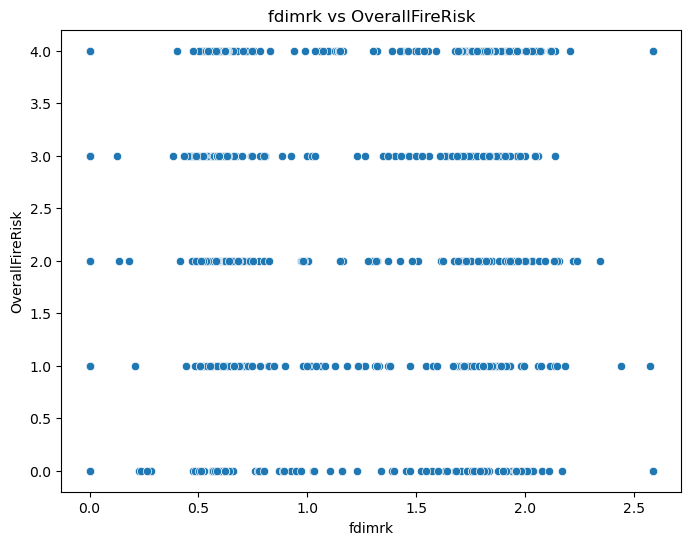

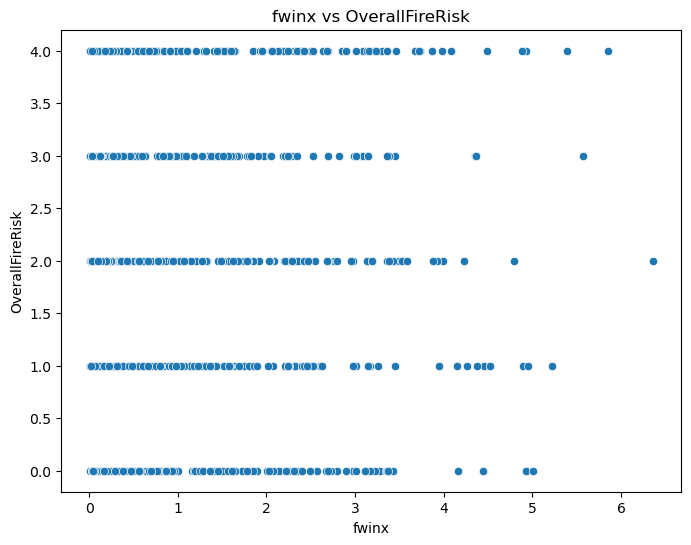

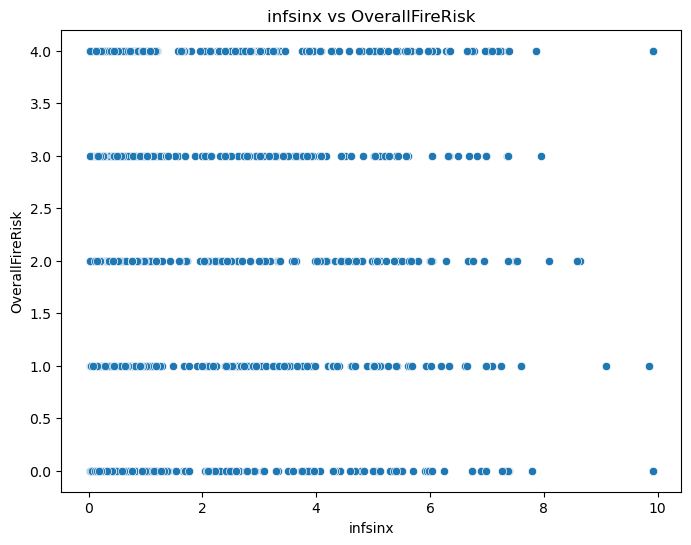

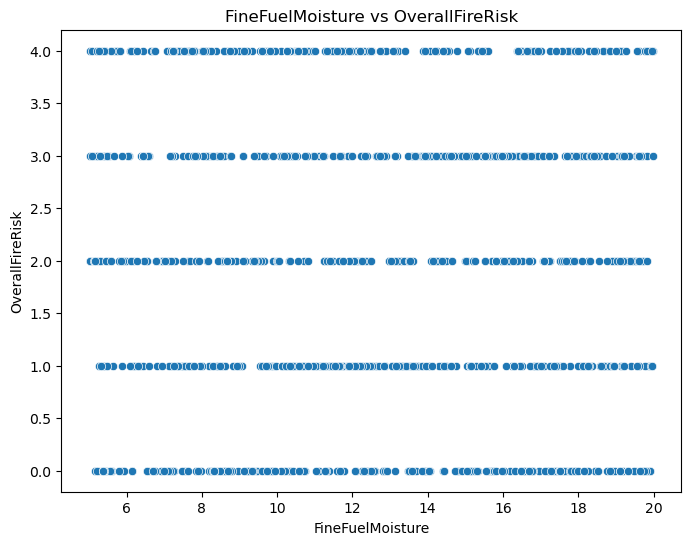

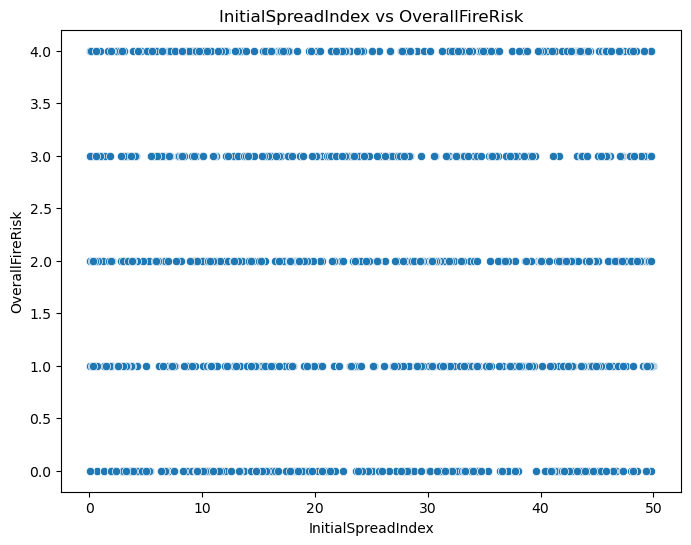

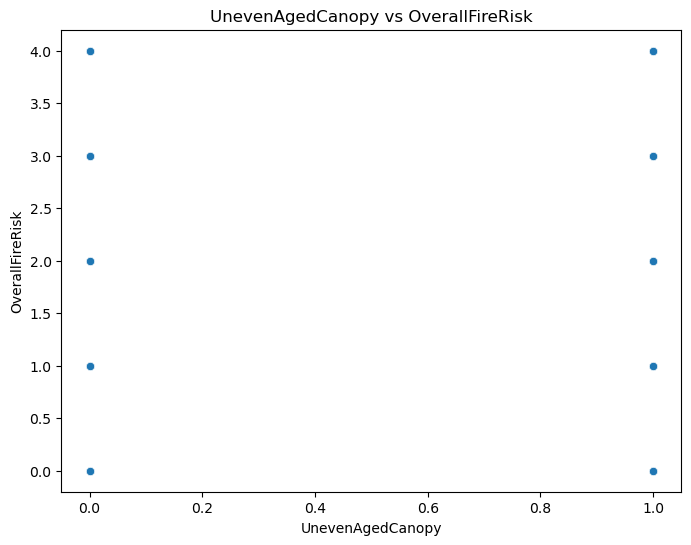

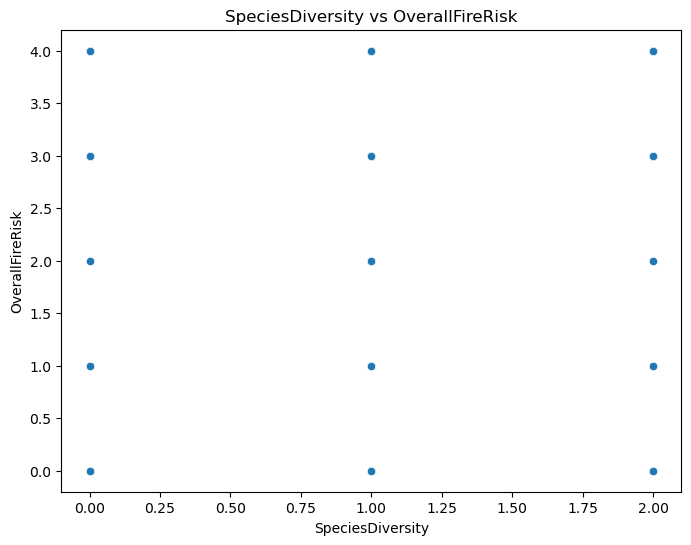

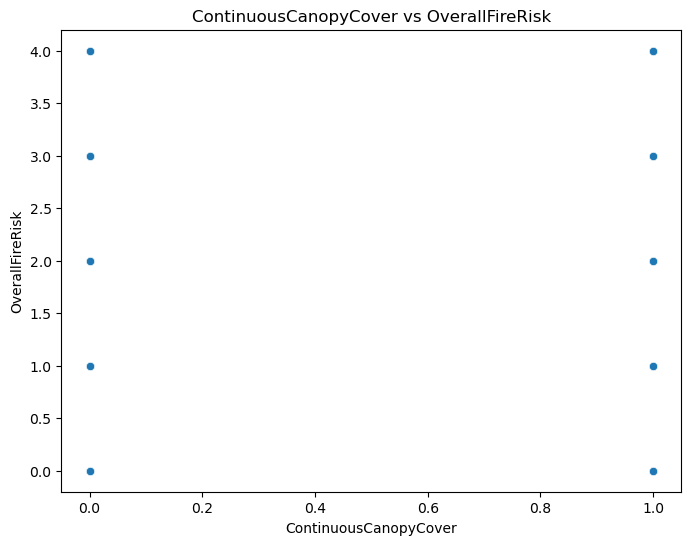

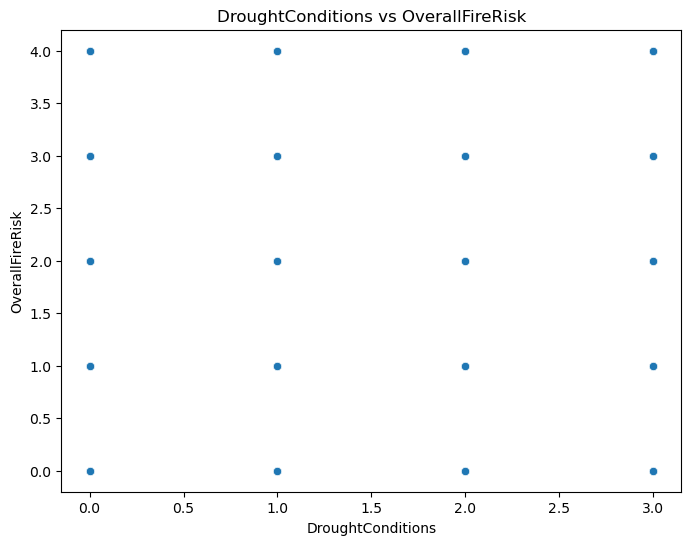

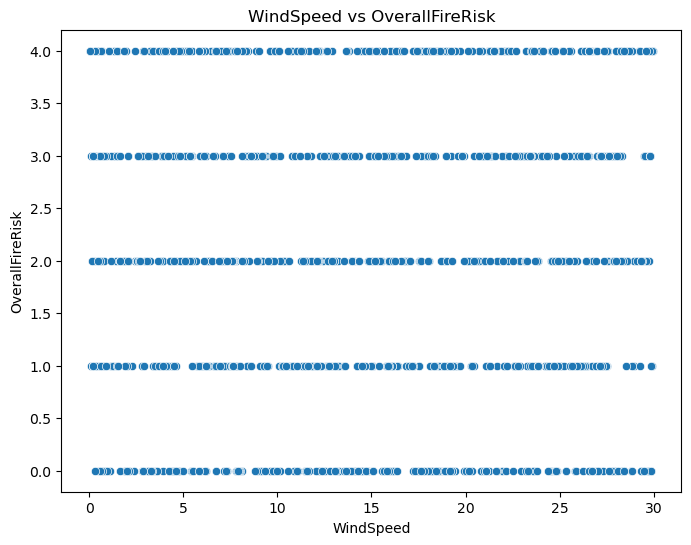

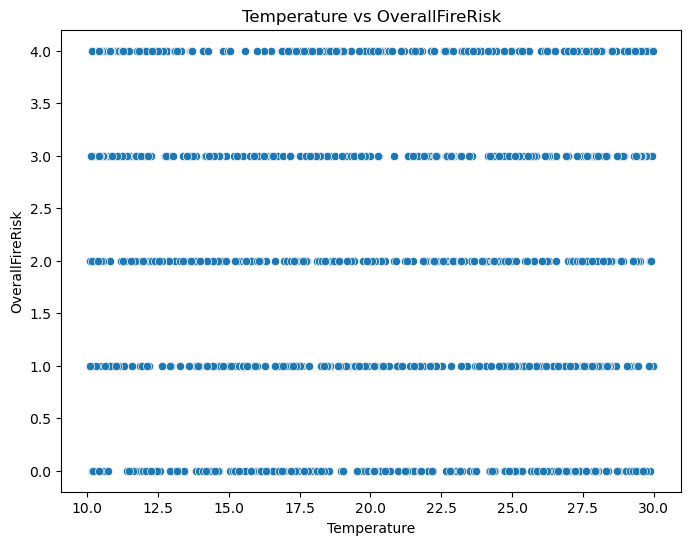

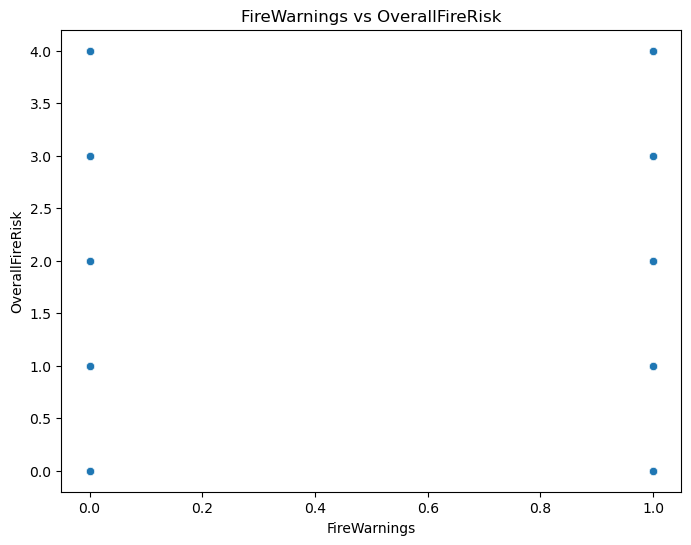

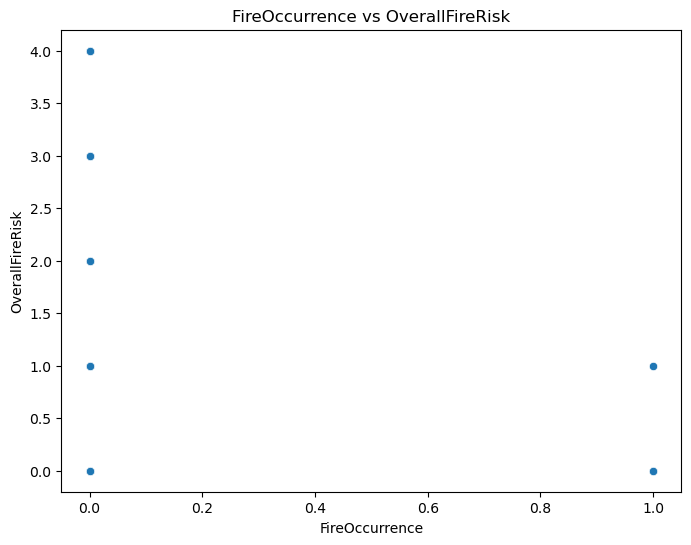

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


# List of columns to plot against 'OverallFireRisk'
columns_to_plot = ['latitude', 'longitude', 'surface', 'fbupinx', 'buinfdr', 'drtcode', 'drtmrk',
                   'dufmcode', 'ffmcode', 'fdsrte', 'fdimrk', 'fwinx', 'infsinx',
                   'FineFuelMoisture', 'InitialSpreadIndex', 'UnevenAgedCanopy',
                   'SpeciesDiversity', 'ContinuousCanopyCover', 'DroughtConditions',
                   'WindSpeed', 'Temperature', 'FireWarnings', 'FireOccurrence']

# Plot individual graphs
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=balanced_data[column], y=balanced_data['OverallFireRisk'])
    plt.title(f'{column} vs OverallFireRisk')
    plt.xlabel(column)
    plt.ylabel('OverallFireRisk')
    plt.show()


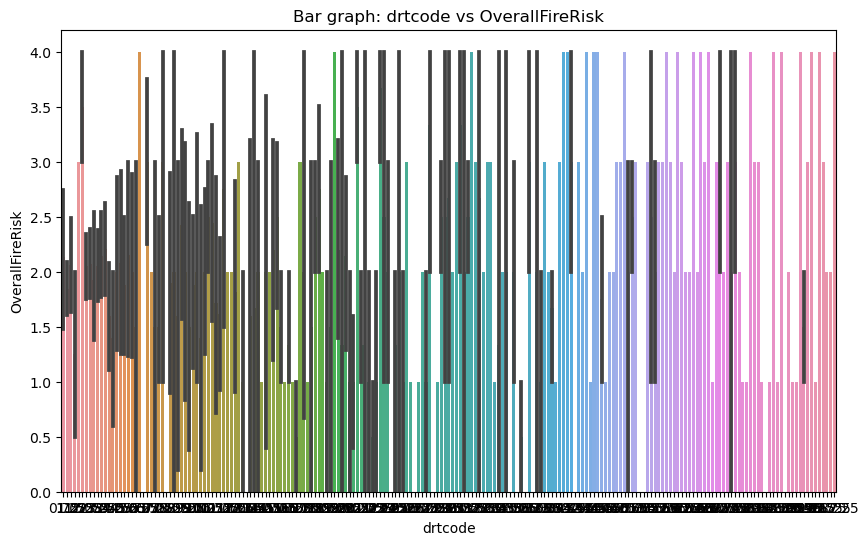

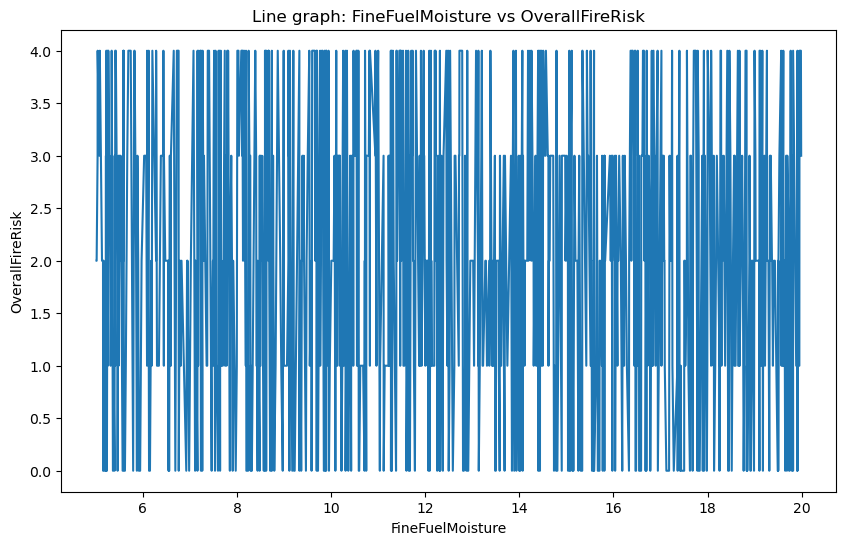

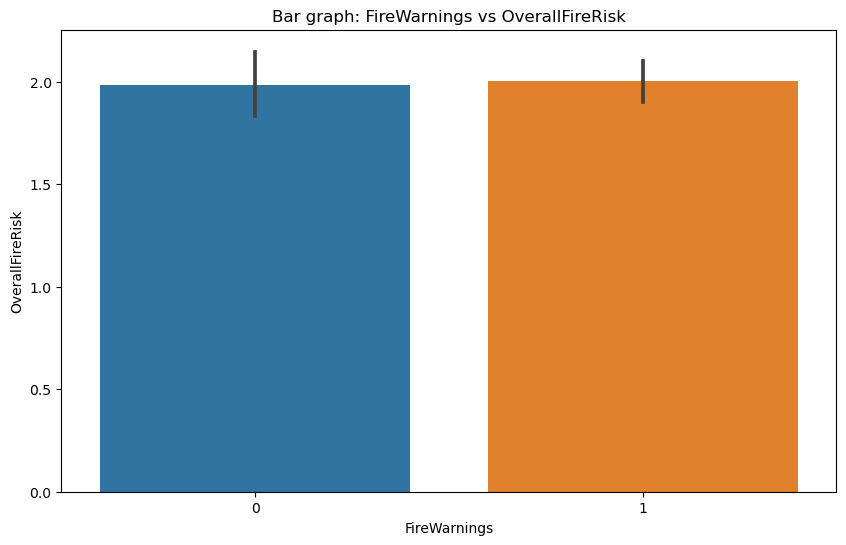

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


# Bar graph for categorical feature 'drtcode'
plt.figure(figsize=(10, 6))
sns.barplot(x='drtcode', y='OverallFireRisk', data=balanced_data)
plt.title('Bar graph: drtcode vs OverallFireRisk')
plt.xlabel('drtcode')
plt.ylabel('OverallFireRisk')
plt.show()

# Line graph for continuous feature 'FineFuelMoisture'
plt.figure(figsize=(10, 6))
sns.lineplot(x='FineFuelMoisture', y='OverallFireRisk', data=balanced_data)
plt.title('Line graph: FineFuelMoisture vs OverallFireRisk')
plt.xlabel('FineFuelMoisture')
plt.ylabel('OverallFireRisk')
plt.show()

# Bar graph for another categorical feature 'FireWarnings'
plt.figure(figsize=(10, 6))
sns.barplot(x='FireWarnings', y='OverallFireRisk', data=balanced_data)
plt.title('Bar graph: FireWarnings vs OverallFireRisk')
plt.xlabel('FireWarnings')
plt.ylabel('OverallFireRisk')
plt.show()


# ** Performing Feature extraction**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14432\454268907.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = balanced_data.corr()


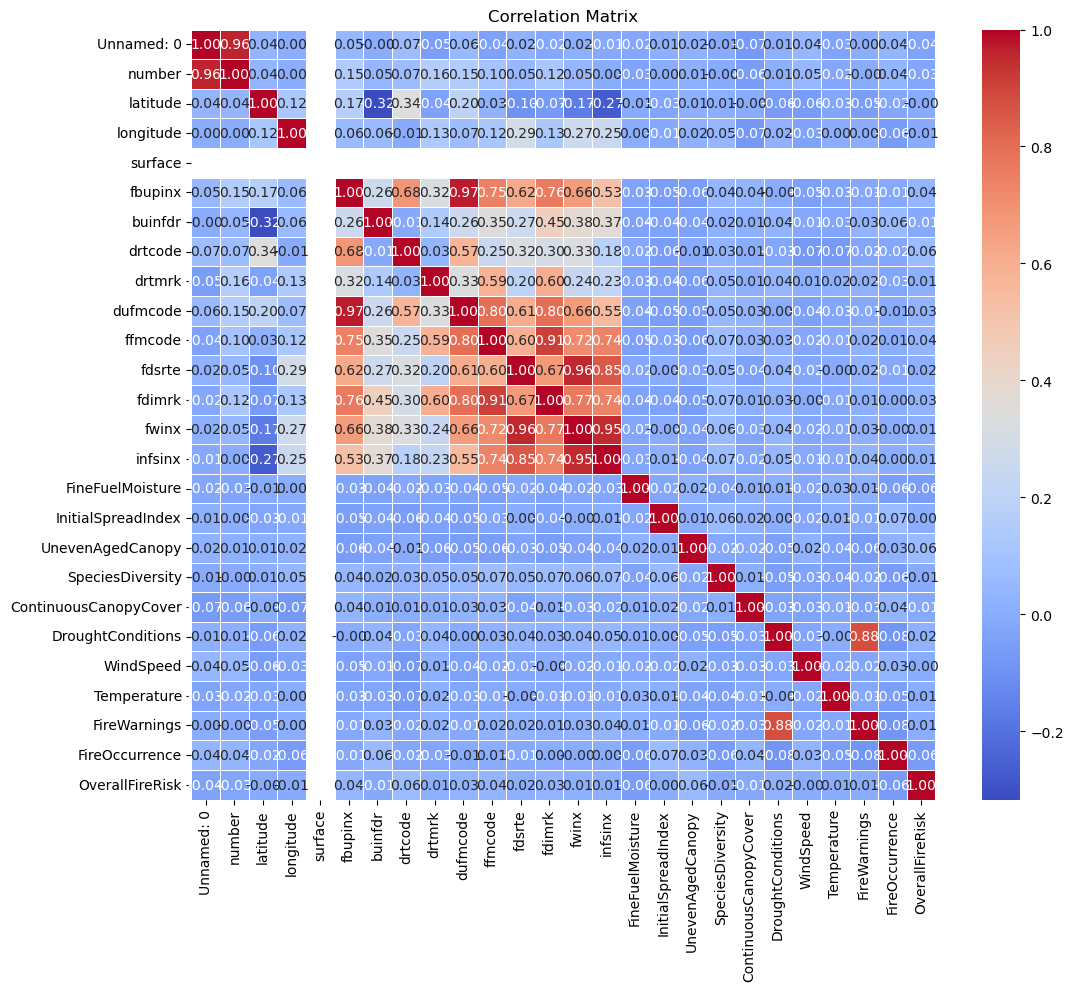

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your balanced dataset is named balanced_data
# Display the correlation matrix
correlation_matrix = balanced_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


In [22]:
columns_to_drop = ['surface', 'FireWarnings', 'ffmcode', 'fdsrte', 'dufmcode', 'fwinx', 'Unnamed: 0', 'time', 'fdimrk', 'drtcode', 'FireOccurrence', 'fbupinx']

# Drop the specified columns
balanced_data = balanced_data.drop(columns=columns_to_drop)

# Display the modified dataset
balanced_data.head()


number  latitude  longitude  buinfdr    drtmrk   infsinx  FineFuelMoisture  \
0       0   53.6945    -7.3055      0.0  5.732309  1.031250          5.018856   
1       0   53.6945    -7.0555      0.0  5.744516  1.134766          6.656874   
2       0   53.6945    -6.8055      0.0  5.752573  1.161133         15.090053   
3       0   53.6945    -6.5555      0.0  5.760629  1.187500          7.611128   
4       0   53.6945    -6.3055      0.0  5.768198  1.265625         11.874508   

   InitialSpreadIndex  UnevenAgedCanopy  SpeciesDiversity  \
0           18.676454                 0                 2   
1            9.350941                 0                 0   
2           37.350555                 1                 0   
3           16.753994                 1                 2   
4           33.633801                 1                 0   

   ContinuousCanopyCover  DroughtConditions  WindSpeed  Temperature  \
0                      1                  2   2.501573    19.837361   
1                      1                  2  13.793198    12.697620   
2                      1                  2   3.878573    11.412013   
3                      1                  2   6.460220    26.059710   
4                      1                  2  20.313700    25.500978   

   OverallFireRisk  
0                2  
1                4  
2                3  
3                4  
4                1

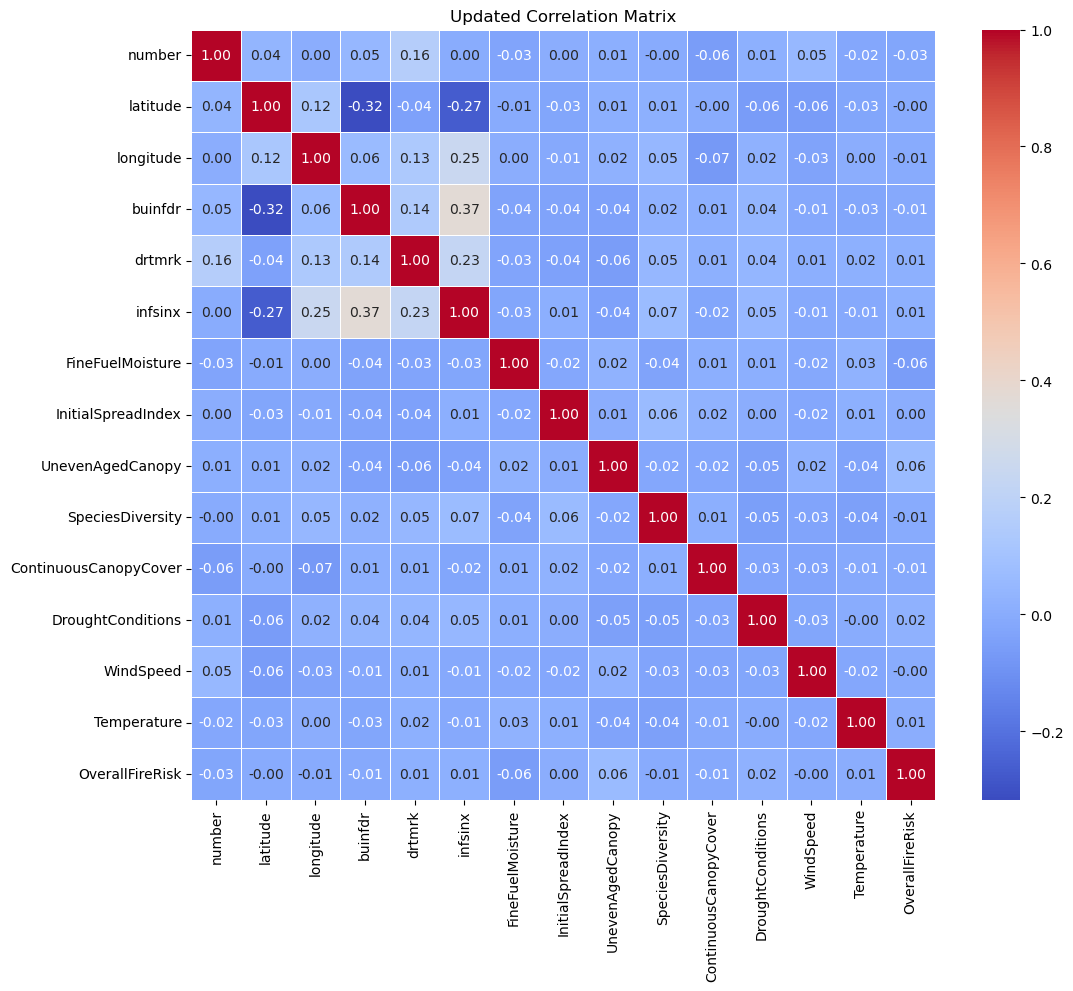

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the updated correlation matrix
correlation_matrix_updated = balanced_data.corr()

# Plot the updated correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_updated, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Updated Correlation Matrix")
plt.show()
